# Assignment 6
_by Mikhail Karasikov_

**Task 1** (5 points) – Interior-Point Method.

Implement the interior-point method for an inequality-constrained LP in $2$ dimensions. You can assume that the problem is feasible, and in particular that $(0,0)$ is feasible. You can also assume that the feasible set is a compact (i.e. finite closed) polygon that lies within $[-1,1] \times [-1,1]$. Your code should plot the feasible set and the progress of the method towards the optimum (to visualize the feasible polygon, you can use a dense mesh of points obtained by the `ndgrid` on $[-1,1] \times [-1,1]$). Try your method on several examples and submit three or four visualizations that are the most interesting. Lite version (2 points): you can use `fminunc` to solve the unconstrained subtasks.

**Task 2** (4 points) – Ticket-to-Ride.

You are opening a railroad company using the existing railroad tracks. You can start operations along any of the section of the rail on the map below. Each section you choose to operate will give you a certain yearly profit (always positive, specified in `TicketToRide.m`). However, in any city that is adjacent to the sections you operate, you need to open and maintain a depot, which has a yearly cost of $10$ units. Using the reduction to maxflow and an LP solver for the maxflow, find out the optimal strategy in this situation (which sections to open). In your report put the map with the cities and/or sections you decide to operate highlighted (use any graphical editor) for that.

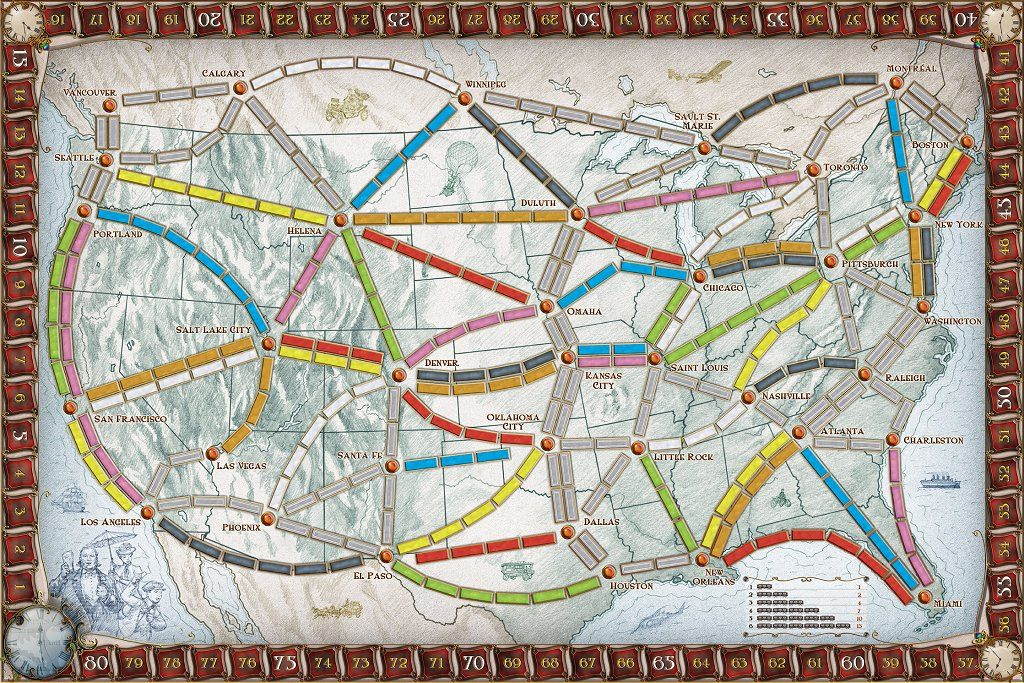

In [1]:
import PIL.Image
railroad_map = PIL.Image.open('TicketToRide.png')
railroad_map

In [2]:
import numpy as np

cities = [
    'Atlanta','Boston', 'Calgary', 'Charleston','Chicago','Dallas', 
    'Denver', 'Duluth', 'ElPaso','Helena', 'Houston', 'KansasCity', 'LasVegas',
    'LittleRock', 'LosAngeles', 'Miami', 'Montreal', 'Nashville',
    'NewOrleans', 'NewYork', 'OklahomaCity', 'Omaha', 'Phoenix',
    'Pittsburgh', 'Portland', 'Raleigh', 'SaintLouis','SaltLakeCity',
    'SanFrancisco','SantaFe', 'SaultStMarie', 'Seattle', 'Toronto',
    'Vancouver', 'Washington', 'Winnipeg'
]

def GetMatrix(links, cities):
    d = dict((city, id) for id, city in enumerate(cities))
    A = np.zeros((len(cities), len(cities)))
    for i in range(0, len(links), 3):
        A[d[links[i]], d[links[i+1]]] = links[i+2]
    return A

#def GetMatrix(links, cities):
#    A = np.zeros((len(cities), len(cities)))
#    for i in xrange(0, len(links), 3):
#        A[cities.index(links[i]), cities.index(links[i + 1])] =  links[i+2]
#    return A

blue = [
    'Winnipeg', 'Helena', 4,
    'Portland', 'SaltLakeCity', 6,
    'Omaha', 'Chicago', 4,
    'Montreal', 'NewYork', 3,
    'KansasCity', 'SaintLouis', 2,
    'SantaFe', 'OklahomaCity', 3,
    'Atlanta', 'Miami', 5
]

blue = GetMatrix(blue,cities)

white = [
    'Calgary', 'Winnipeg', 6,
    'Chicago', 'Toronto', 4,
    'SaintLouis', 'Chicago', 2,
    'Pittsburgh', 'NewYork', 2,
    'SanFrancisco', 'SaltLakeCity', 5,
    'Phoenix', 'Denver', 5,
    'LittleRock', 'Nashville', 3
]

white = GetMatrix(white,cities)

green = [
    'Portland', 'SanFrancisco', 5,
    'Helena', 'Denver', 4,
    'SaintLouis', 'Pittsburgh', 5,
    'LittleRock', 'NewOrleans', 3,
    'ElPaso', 'Houston', 6
]

green = GetMatrix(green,cities)

red = [
    'Helena', 'Omaha', 5,
    'Denver', 'OklahomaCity', 4,
    'ElPaso', 'Dallas', 4,
    'NewOrleans', 'Miami', 6,
    'NewYork', 'Boston', 2,
    'Duluth', 'Chicago', 3
]

red = GetMatrix(red,cities)

purple = [
    'Helena', 'SaltLakeCity', 3,
    'Denver', 'Omaha', 4,
    'Duluth', 'Toronto', 6,
    'Charleston', 'Miami', 4,
    'SanFrancisco', 'LosAngeles', 3
]

purple = GetMatrix(purple,cities)

orange = [
    'LasVegas', 'SaltLakeCity', 3,
    'Helena', 'Duluth', 6,
    'Chicago', 'Pittsburgh', 3,
    'Denver', 'KansasCity', 4,
    'NewYork', 'Washington', 2,
    'Atlanta', 'NewOrleans', 4
]

orange = GetMatrix(orange,cities)

black = [
    'LosAngeles', 'ElPaso', 6,
    'Winnipeg', 'Duluth', 4,
    'SaultStMarie', 'Montreal', 5,
    'Nashville', 'Raleigh', 3
]

black = GetMatrix(black,cities)

yellow = [
    'Seattle', 'Helena', 6,
    'ElPaso', 'OklahomaCity', 5,
    'Nashville', 'Pittsburgh', 4
]

yellow = GetMatrix(yellow,cities)

gray = [
    'Vancouver', 'Seattle', 1,
    'Portland', 'Seattle', 1,
    'Vancouver', 'Calgary', 3,
    'Seattle', 'Calgary', 4,
    'Calgary', 'Helena', 4,
    'Winnipeg', 'SaultStMarie', 6,
    'Duluth', 'SaultStMarie', 3,
    'SaultStMarie', 'Toronto', 2,
    'Toronto', 'Montreal', 3,
    'Montreal', 'Boston', 2,
    'Toronto', 'Pittsburgh', 2,
    'LasVegas', 'LosAngeles', 2,
    'LosAngeles', 'Phoenix', 3,
    'Phoenix', 'ElPaso', 3,
    'ElPaso', 'SantaFe', 2,
    'Phoenix', 'SantaFe', 3,
    'SantaFe', 'Denver', 2,
    'Duluth', 'Omaha', 2,
    'Omaha', 'KansasCity', 1,
    'KansasCity', 'OklahomaCity', 2,
    'OklahomaCity', 'Dallas', 2,
    'Dallas', 'Houston', 1,
    'Houston', 'NewOrleans', 2,
    'Dallas', 'LittleRock', 2,
    'OklahomaCity', 'LittleRock', 2,
    'LittleRock', 'SaintLouis', 2,
    'SaintLouis', 'Nashville', 2,
    'Nashville', 'Atlanta', 1,
    'Atlanta', 'Charleston', 2,
    'Charleston', 'Raleigh', 2,
    'Atlanta', 'Raleigh', 2,
    'Raleigh', 'Washington', 2,
    'Raleigh', 'Pittsburgh', 2,
    'Washington', 'Pittsburgh', 2
]

gray = GetMatrix(gray,cities)

profit = (
    blue * 1.0 +
    white * 1.5 +
    green * 2.0 +
    red * 2.0 +
    purple * 2.5 +
    orange * 1.0 +
    black * 1.0 +
    yellow * 2.0 +
    gray * 1.0
)

# profit_sym = np.dstack([profit, profit.transpose()]).max(axis=2)

costs = np.ones((len(cities), 1)) * 10

The problem can be stated s follows:

$$
\begin{aligned}
&\min\limits_{x\in\{0,1\}^n}
&&\sum\limits_{i}10 x_i - \sum\limits_{ij} v_{ij} x_i x_j,
\end{aligned}
$$
where $10$ is an opening cost for a depot and $v_{ij}$ --  yearly profit of section $(i,j)$.

This is particular case of binary optimization problem with submodular terms
$$
\begin{aligned}
&\min\limits_{x\in\{0,1\}^n}
&&\sum\limits_{i}E(x_i) + \sum\limits_{ij} E_{ij}(x_i,x_j).
\end{aligned}
$$

Since $E_{ij}\leq0\ \forall i,j$, all the pairwise terms are submodular. Hence, this problem can be reduced to the following one:
$$
\begin{aligned}
&\min\limits_{x\in\{0,1\}^n}
&&\sum\limits_{i}u_i x_i + \sum\limits_{ij} u_{ij} \max(x_j-x_i, 0).
\end{aligned}
$$
In our case $$u_i = 10 - \sum\limits_{j}v_{ji},\quad u_{ij} = v_{ij}.$$

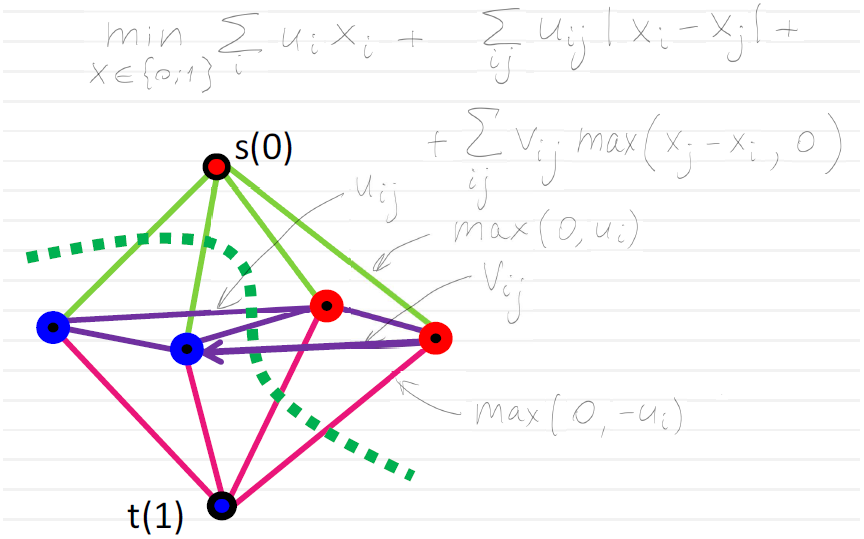

In [3]:
import PIL.Image
problem_reduction = PIL.Image.open('problem_reduction.png')
problem_reduction

In [14]:
U = np.zeros((profit.shape[0] + 2, profit.shape[0] + 2))
U[1:-1, 1:-1] = profit

opening_cost = 10

costs = opening_cost - U[1:-1, 1:-1].sum(0)
print costs

pos = np.arange(costs.size)[costs > 0]
neg = np.arange(costs.size)[costs < 0]

U[1 + np.arange(costs.size)[costs < 0], [-1] * np.sum(costs < 0)] = -costs[costs < 0]
U[[0] * np.sum(costs > 0), 1 + np.arange(costs.size)[costs > 0]] = costs[costs > 0]

np.set_printoptions(threshold='nan')


[  9.    4.    3.    8.   -3.    0.   -7.5   0.    1.  -10.   -3.    5.
  10.    6.    0.5 -17.    2.    3.5  -2.    4.  -13.  -12.    7.  -17.
  10.    3.    6.  -14.    0.    5.    1.    8.  -13.   10.    6.    1. ]


In [9]:
import cvxpy

x = cvxpy.Variable(U.shape[0])

objective = cvxpy.Minimize(sum([U[i, j] * cvxpy.pos(x[j] - x[i]) for i, j in np.ndindex(U.shape)]))
constraints = [
    x[0] == 0,
    x[-1] == 1,
    x >= 0,
    x <= 1
]

prob = cvxpy.Problem(objective, constraints)
prob.solve(solver='GUROBI')

opened_depots = list(np.array(cities)[np.array(x.value).astype(bool)[1:-1].ravel()])

print('Optimal value is: {0}'.format(prob.value))
print("Opened %d depots: %s" % (len(opened_depots), opened_depots))

Optimal value is: 86.0
Opened 27 depots: ['Atlanta', 'Calgary', 'Charleston', 'Chicago', 'Dallas', 'Denver', 'Duluth', 'ElPaso', 'Helena', 'Houston', 'LittleRock', 'LosAngeles', 'Miami', 'Nashville', 'NewOrleans', 'OklahomaCity', 'Omaha', 'Phoenix', 'Pittsburgh', 'Portland', 'SaintLouis', 'SaltLakeCity', 'SanFrancisco', 'SaultStMarie', 'Seattle', 'Toronto', 'Winnipeg']


In [6]:
cities_set = set(cities)
cities_set.difference(opened_depots)

{'Boston',
 'KansasCity',
 'LasVegas',
 'Montreal',
 'NewYork',
 'Raleigh',
 'SantaFe',
 'Vancouver',
 'Washington'}

In [8]:
ids = [cities.index(city) for city in opened_depots]
print("Yearly profit: %.1f" % (np.sum([profit[i, j] for i in ids for j in ids]) - opening_cost * len(opened_depots)))

Yearly profit: 25.5


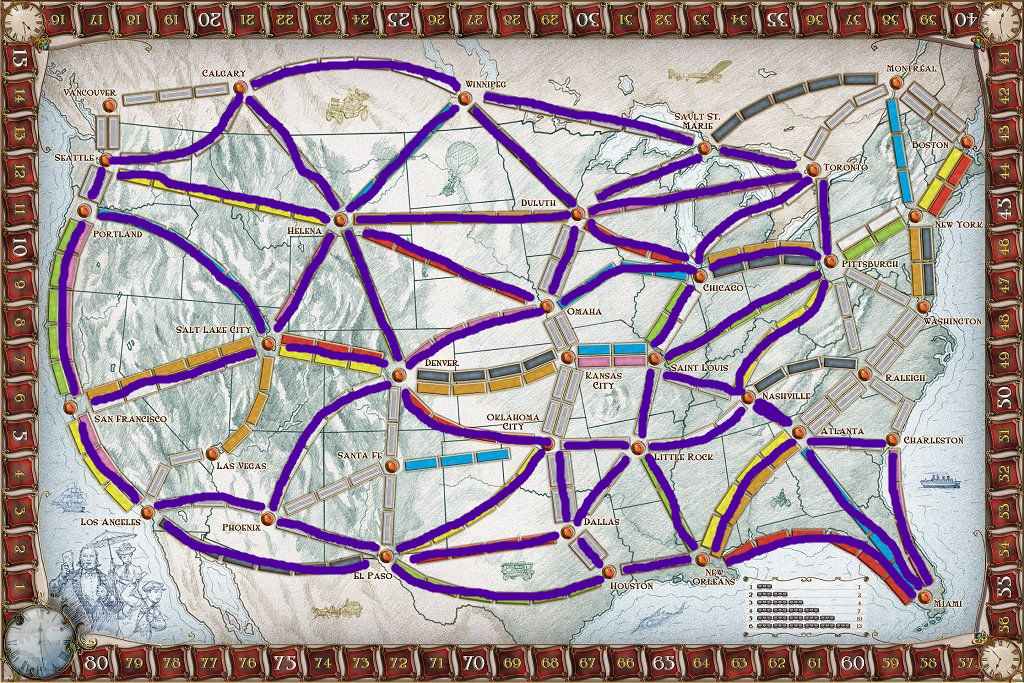

In [9]:
import PIL.Image
opened_depots = PIL.Image.open('TicketToRideDepots.png')
opened_depots